**Estudio del dengue/chikungunya en México 01/01/2024 hasta 02/09/2024**

El **dengue** (al igual que la **chikungunya**) es una enfermedad causada por un virus y se transmite a las personas por la picadura del mosquito portador de la 
enfermedad.

![alt text](foto_dengue.png)

Al presentarse principalmente en regiones tropicales y subtropicales, es importante analizar esta enfermedad en México.

El **objetivo principal** de este proyecto es poder determinar, dadas las variables, si el paciente fallecerá.

Entre los **objetivos** secundarios se encuentran:

- Determinar el impacto de otras enfermedades con el virus.
- Determinar zonas de mayor riesgo de transmisión del virus.
- Determinar la eficiencia de las instituciones de salud y los estudios clínicos.


**Lectura y prsentación de los datos**

In [103]:
#Base de datos dengue/chikunguya México (01/01/2024 - 02/09/2024) y cátalogos descriptivos

#Librerías

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter

#Base de datos y catálogos

dengue_data = pd.read_csv("dengue_abierto.csv")         
dengue_descr = pd.read_csv("Descriptores_Dengue.csv")
dengue_caso = pd.read_csv("CATALOGO_ESTATUS_CASO.csv")
dengue_PCR = pd.read_csv("CATALOGO_RESULTADO_PCR.csv")
dengue_dict = pd.read_csv("CATALOGO_DICTAMEN.csv")
dengue_tpx = pd.read_csv("CATALOGO_TIPO_PACIENTE.csv")
dengue_munic = pd.read_csv("CATALOGO_MUNICIPIOS.csv")
dengue_entidad = pd.read_csv("CATALOGO_ENTIDAD.csv")
dengue_inst = pd.read_csv("CATALOGO_INSTITUCION.csv")
dengue_si_no = pd.read_csv("CATALOGO_SI_NO.csv")
dengue_sexo = pd.read_csv("CATALOGO_SEXO.csv")

In [104]:
#Base de datos dengue/chikunguya México (01/01/2024 - 02/09/2024)

dengue_data

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
0,02/09/2024,849113,2,35,12,29,2,2,12,29,...,2,2,2,2,5.0,1,5,3,12,29
1,02/09/2024,873810,2,55,18,17,2,2,18,17,...,2,2,2,2,5.0,2,5,1,18,17
2,02/09/2024,1081911,2,11,20,67,2,2,20,67,...,2,2,2,2,5.0,2,5,1,20,67
3,02/09/2024,1207499,1,51,17,11,2,2,17,11,...,2,2,2,2,5.0,1,5,1,17,11
4,02/09/2024,1299508,1,5,23,5,2,2,23,5,...,2,2,2,2,5.0,1,5,3,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237591,02/09/2024,1564857,2,34,17,18,2,2,17,7,...,2,2,2,2,5.0,1,5,1,17,18
237592,02/09/2024,1564858,1,21,17,7,2,2,17,7,...,2,2,2,2,5.0,1,5,1,17,7
237593,02/09/2024,1564859,2,3,7,40,2,2,7,40,...,2,2,2,2,5.0,1,5,1,7,40
237594,02/09/2024,1564860,1,19,15,82,2,2,15,82,...,2,2,2,2,5.0,1,5,1,15,82


In [105]:
#Tipos de datos de la base de datos

print(dengue_data.dtypes)


FECHA_ACTUALIZACION        object
ID_REGISTRO                 int64
SEXO                        int64
EDAD_ANOS                   int64
ENTIDAD_RES                 int64
MUNICIPIO_RES               int64
HABLA_LENGUA_INDIG          int64
INDIGENA                    int64
ENTIDAD_UM_NOTIF            int64
MUNICIPIO_UM_NOTIF          int64
INSTITUCION_UM_NOTIF        int64
FECHA_SIGN_SINTOMAS        object
TIPO_PACIENTE               int64
HEMORRAGICOS                int64
DIABETES                    int64
HIPERTENSION                int64
ENFERMEDAD_ULC_PEPTICA      int64
ENFERMEDAD_RENAL            int64
INMUNOSUPR                  int64
CIRROSIS_HEPATICA           int64
EMBARAZO                    int64
DEFUNCION                   int64
DICTAMEN                  float64
TOMA_MUESTRA                int64
RESULTADO_PCR               int64
ESTATUS_CASO                int64
ENTIDAD_ASIG                int64
MUNICIPIO_ASIG              int64
dtype: object


In [106]:
#Descripción de los datos

dengue_data.describe()

,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,INSTITUCION_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
count,2.375960e+05,237596.000000,237596.000000,237596.000000,237596.000000,237596.000000,237596.000000,237596.000000,237596.000000,237596.000000,...,237596.000000,237596.000000,237596.000000,237596.000000,237591.000000,237596.000000,237596.000000,237596.000000,237596.000000,237596.000000
mean,1.432164e+06,1.454566,28.883024,17.133083,56.398252,1.981485,1.977428,17.123929,52.729381,10.418113,...,1.998721,1.999263,1.987218,1.996444,4.994406,1.494516,4.800178,1.616454,17.417650,59.481035
std,7.599311e+04,0.497932,18.498862,7.098741,85.673926,0.134803,0.148535,7.099216,88.380208,7.908899,...,0.035747,0.027129,0.112334,0.059530,0.115136,0.499971,0.650382,0.807822,8.462982,100.929270
min,8.491130e+05,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.367372e+06,1.000000,14.000000,12.000000,8.000000,2.000000,2.000000,12.000000,7.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,5.000000,1.000000,5.000000,1.000000,12.000000,8.000000
50%,1.431172e+06,1.000000,26.000000,17.000000,29.000000,2.000000,2.000000,17.000000,31.000000,6.000000,...,2.000000,2.000000,2.000000,2.000000,5.000000,1.000000,5.000000,1.000000,17.000000,29.000000
75%,1.495044e+06,2.000000,41.000000,21.000000,67.000000,2.000000,2.000000,21.000000,67.000000,20.000000,...,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,5.000000,2.000000,21.000000,67.000000
max,1.564861e+06,2.000000,140.000000,35.000000,570.000000,2.000000,2.000000,32.000000,999.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,5.000000,3.000000,99.000000,999.000000


In [107]:
#Busqueda de datos nulos y reemplazo de los mismos
print(dengue_data.isna().sum())
for col in ['DICTAMEN']:
    dengue_data[col]= dengue_data[col].fillna(5)
print()
print()
print()
print(dengue_data.isna().sum())

FECHA_ACTUALIZACION       0
ID_REGISTRO               0
SEXO                      0
EDAD_ANOS                 0
ENTIDAD_RES               0
MUNICIPIO_RES             0
HABLA_LENGUA_INDIG        0
INDIGENA                  0
ENTIDAD_UM_NOTIF          0
MUNICIPIO_UM_NOTIF        0
INSTITUCION_UM_NOTIF      0
FECHA_SIGN_SINTOMAS       0
TIPO_PACIENTE             0
HEMORRAGICOS              0
DIABETES                  0
HIPERTENSION              0
ENFERMEDAD_ULC_PEPTICA    0
ENFERMEDAD_RENAL          0
INMUNOSUPR                0
CIRROSIS_HEPATICA         0
EMBARAZO                  0
DEFUNCION                 0
DICTAMEN                  5
TOMA_MUESTRA              0
RESULTADO_PCR             0
ESTATUS_CASO              0
ENTIDAD_ASIG              0
MUNICIPIO_ASIG            0
dtype: int64



FECHA_ACTUALIZACION       0
ID_REGISTRO               0
SEXO                      0
EDAD_ANOS                 0
ENTIDAD_RES               0
MUNICIPIO_RES             0
HABLA_LENGUA_INDIG        0
INDI

In [109]:
#Catálogos descriptivos de la base de datos
print("Descriptores")
dengue_descr = pd.read_csv("Descriptores_Dengue.csv")
dengue_descr


Descriptores


,NO.,NOMBRE DE VARIABLE,DESCRIPCION,FORMATO O FUENTE
0,1,FECHA_ACTUALIZACION,LA BASE DE DATOS SE ACTUALIZA SEMANALMENTE. ES...,"AAAA-MM-DD, 9999-99-99: CUANDO NO HAY REGISTRO"
1,2,ID_REGISTRO,NÚMERO DE INDETIFICADOR DEL CASO,TEXTO
2,3,SEXO,IDENTIFICA EL SEXO DEL PACIENTE,CATÁLOGO: SEXO
3,4,EDAD_ANOS,IDENTIFICA LA EDAD EN AÑOS DEL PACIENTE,NÚMERICA EN AÑOS
4,5,ENTIDAD_RES,IDENTIFICA LA ENTIDAD DE RESIDENCIA DEL PACIENTE,CATÁLOGO: ENTIDADES
5,6,MUNICIPIO_RES,IDENTIFICA EL MUNICIPIO DE RESIDENCIA DEL PACI...,CATÁLOGO: MUNICIPIOS
6,7,HABLA_LENGUA_INDIG,IDENTIFICA SI EL PACIENTE HABLA LENGUA INDIGENA,CATÁLOGO: SI /NO
7,8,INDIGENA,IDENTIFICA SI EL PACIENTE SE AUTOIDENTIFICA CO...,CATÁLOGO: SI /NO
8,9,ENTIDAD_UM_NOTIF,IDENTIFICA LA ENTIDAD DONDE SE ENCUENTRA LA UN...,CATÁLOGO: ENTIDADES
9,10,MUNICIPIO_UM_NOTIF,IDENTIFICA EL MUNICIPIO DONDE SE ENCUENTRA LA ...,CATÁLOGO: MUNICIPIOS


In [110]:
print("Estatus del caso")

dengue_caso


Estatus del caso


,CLAVE,DESCRIPCIÓN
0,1,PROBABLE
1,2,CONFIRMADO
2,3,DESCARTADO


In [111]:
print("Resultado del estudio PCR")

dengue_PCR


Resultado del estudio PCR


,CLAVE,DESCRIPCIÓN
0,1,DENV1
1,2,DENV2
2,3,DENV3
3,4,DENV4
4,5,SIN SEROTIPO AISLADO


Como en muchos virus, existen varias cepas o serotipos de dengue. En específico, existen 4 serotipos de dengue y se denominan DENV1, DENV2, DENV3 y DENV4.

![alt text](E8cqLkVWYAUVNla-1.jpg)

In [112]:
print("Dictamen del paciente")

dengue_dict


Dictamen del paciente


,CLAVE,DESCRIPCIÓN
0,1,CONFIRMADO A DENGUE
1,2,CONFIRMADO A CHIKUNGUNYA
2,3,NEGATIVO
3,4,EN ESTUDIO
4,5,NO APLICA


In [113]:
print("Tipo de tratamiento del paciente")

dengue_tpx


Tipo de tratamiento del paciente


,CLAVE,DESCRIPCIÓN
0,1,AMBULATORIO
1,2,HOSPITALIZADO


In [114]:
print("Municipios")

dengue_munic


Municipios


,CLAVE_MUNICIPIO,MUNICIPIO,CLAVE_ENTIDAD
0,1,AGUASCALIENTES,01
1,2,ASIENTOS,01
2,3,CALVILLO,01
3,4,COSÍO,01
4,5,JESÚS MARÍA,01
...,...,...,...
2498,335,OTROS PAISES,OTROS
2499,999,NO ESPECIFICADO,32
2500,997,NO APLICA,97
2501,998,SE IGNORA,98


In [115]:
print("Entidades")

dengue_entidad


Entidades


,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
0,1,AGUASCALIENTES,AS
1,2,BAJA CALIFORNIA,BC
2,3,BAJA CALIFORNIA SUR,BS
3,4,CAMPECHE,CC
4,5,COAHUILA DE ZARAGOZA,CL
5,6,COLIMA,CM
6,7,CHIAPAS,CS
7,8,CHIHUAHUA,CH
8,9,CIUDAD DE MÉXICO,DF
9,10,DURANGO,DG


In [116]:
print("Catalogación del si y no")

dengue_si_no


Catalogación del si y no


,CLAVE,DESCRIPCIÓN
0,1,SI
1,2,NO


In [117]:
print("Sexo del paciente")

dengue_sexo

Sexo del paciente


,CLAVE,DESCRIPCIÓN
0,1,MUJER
1,2,HOMBRE


In [118]:
print("Institucion de atención del paciente")

dengue_inst 

Institucion de atención del paciente


,CLAVE,DESCRIPCIÓN
0,1,CRUZ ROJA
1,2,DIF
2,3,ESTATAL
3,4,IMSS
4,5,IMSS-BIENESTAR
5,6,ISSSTE
6,7,MUNICIPAL
7,8,PEMEX
8,9,PRIVADA
9,10,SEDENA


**Primera eliminación de variables**

In [119]:
#Primera eliminación de variables

print('Primera eliminación de variables')
dengue_data.drop(columns=['FECHA_ACTUALIZACION','ID_REGISTRO','MUNICIPIO_RES','MUNICIPIO_UM_NOTIF','MUNICIPIO_ASIG'],inplace=True) 
print(dengue_data)

Primera eliminación de variables
        SEXO  EDAD_ANOS  ENTIDAD_RES  HABLA_LENGUA_INDIG  INDIGENA  \
0          2         35           12                   2         2   
1          2         55           18                   2         2   
2          2         11           20                   2         2   
3          1         51           17                   2         2   
4          1          5           23                   2         2   
...      ...        ...          ...                 ...       ...   
237591     2         34           17                   2         2   
237592     1         21           17                   2         2   
237593     2          3            7                   2         2   
237594     1         19           15                   2         2   
237595     1         40           15                   2         2   

        ENTIDAD_UM_NOTIF  INSTITUCION_UM_NOTIF FECHA_SIGN_SINTOMAS  \
0                     12                    12          

**Extracción de los datos de las defunciones**

In [123]:
#Defunciones por dengue
defun_data = dengue_data[((dengue_data['DEFUNCION'] == 1) & (dengue_data['DICTAMEN'] != 3))]

print(defun_data)
defun_data.describe()


        SEXO  EDAD_ANOS  ENTIDAD_RES  HABLA_LENGUA_INDIG  INDIGENA  \
250        1         32           15                   2         2   
293        1         32           11                   2         2   
494        2         42           23                   2         2   
570        1         14           12                   2         2   
1083       1         13            7                   2         1   
...      ...        ...          ...                 ...       ...   
229921     1         26           17                   2         2   
230671     2         62           25                   2         2   
230860     2         62           25                   2         2   
232202     1         79           12                   2         2   
234979     2         26           12                   1         1   

        ENTIDAD_UM_NOTIF  INSTITUCION_UM_NOTIF FECHA_SIGN_SINTOMAS  \
250                   15                     6          02/01/2024   
293                

,SEXO,EDAD_ANOS,ENTIDAD_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,INSTITUCION_UM_NOTIF,TIPO_PACIENTE,HEMORRAGICOS,DIABETES,...,ENFERMEDAD_RENAL,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,...,723.000000,723.000000,723.000000,723.000000,723.0,723.000000,723.000000,723.000000,723.000000,723.000000
mean,1.478562,39.622407,17.825726,1.976487,1.965422,18.017981,12.827109,1.975104,1.952974,1.871369,...,1.944675,1.987552,1.987552,1.968188,1.0,3.499308,1.089903,4.609959,2.301521,19.387275
std,0.499886,25.118994,7.352053,0.151631,0.182835,7.385016,9.479924,0.155917,0.211842,0.335023,...,0.228772,0.110951,0.110951,0.175620,0.0,1.200617,0.286241,0.842112,0.721905,13.055367
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,2.000000
25%,1.000000,17.000000,12.000000,2.000000,2.000000,12.000000,4.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.0,4.000000,1.000000,5.000000,2.000000,12.000000
50%,1.000000,38.000000,18.000000,2.000000,2.000000,18.000000,12.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.0,4.000000,1.000000,5.000000,2.000000,18.000000
75%,2.000000,60.000000,23.000000,2.000000,2.000000,23.000000,20.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.0,4.000000,1.000000,5.000000,3.000000,24.500000
max,2.000000,100.000000,31.000000,2.000000,2.000000,31.000000,99.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.0,5.000000,2.000000,5.000000,3.000000,99.000000


**Gráficación y ajuste de los datos**

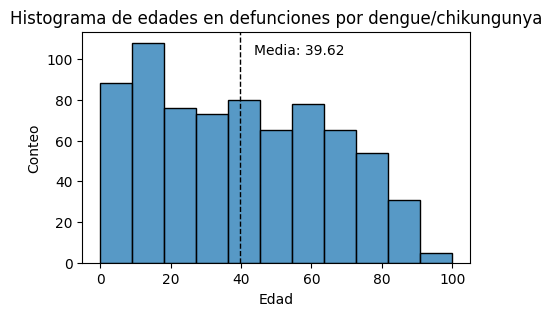

In [124]:
k = int(np.ceil(1+np.log2(len(defun_data)))) #regla de sturges con un numero entero
media = defun_data['EDAD_ANOS'].mean() #Media de las edades

plt.figure(figsize=(5, 3))
sns.histplot(data=defun_data, x='EDAD_ANOS', bins = k)
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.title('Histograma de edades en defunciones por dengue/chikungunya')

#Limites del histograma en y
min_ylim, max_ylim = plt.ylim()

#Añadir la media al histograma
plt.axvline(media, color='k', linestyle='dashed', linewidth=1)
plt.text(media * 1.1, max_ylim * 0.9, f'Media: {media:.2f}')
plt.show()

In [125]:
# 80 distribuciones
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']
# Atributo
fitter = Fitter(defun_data.EDAD_ANOS, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.002612,949.190039,967.523676,inf,0.058497,1.362023e-02
gamma,0.003264,978.074246,991.824474,inf,0.085481,4.802583e-05
norm,0.003664,981.708809,990.875627,inf,0.077679,3.057069e-04
logistic,0.003929,987.989208,997.156027,inf,0.071850,1.085117e-03
expon,0.004263,992.261405,1001.428223,inf,0.132630,1.497701e-11
cauchy,0.004902,1032.965868,1042.132687,inf,0.148765,1.971312e-14
powerlaw,0.013408,1326.075132,1339.825359,inf,0.804964,0.000000e+00
exponpow,0.024264,1399.779228,1413.529456,inf,0.799884,0.000000e+00
chi2,0.066217,1734.737920,1748.488148,inf,0.803053,0.000000e+00


Tenemos que la distribucion que mejor se ajusta a los datos de las defunciones es la distribución beta, que se ve de la siguiente forma

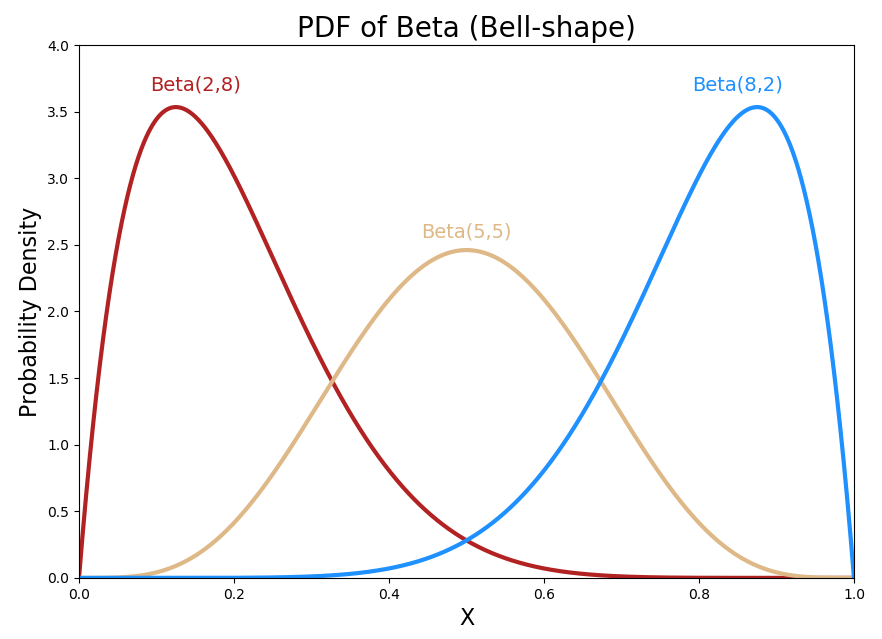

y se escribe como

$$f(x,\alpha,\beta)=\dfrac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)},$$
donde $B(\alpha,\beta)$ es la función Beta dada por

$$B(\alpha,\beta)=\dfrac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)},$$
y donde $\Gamma(\alpha)$ es la función Gamma.

In [128]:
def corr_matrix(data): #matriz de correlación
    correlation = data.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation, annot=True, fmt='.3f', cbar=True, cmap="RdYlGn")

La matriz de correlación para la defunción es


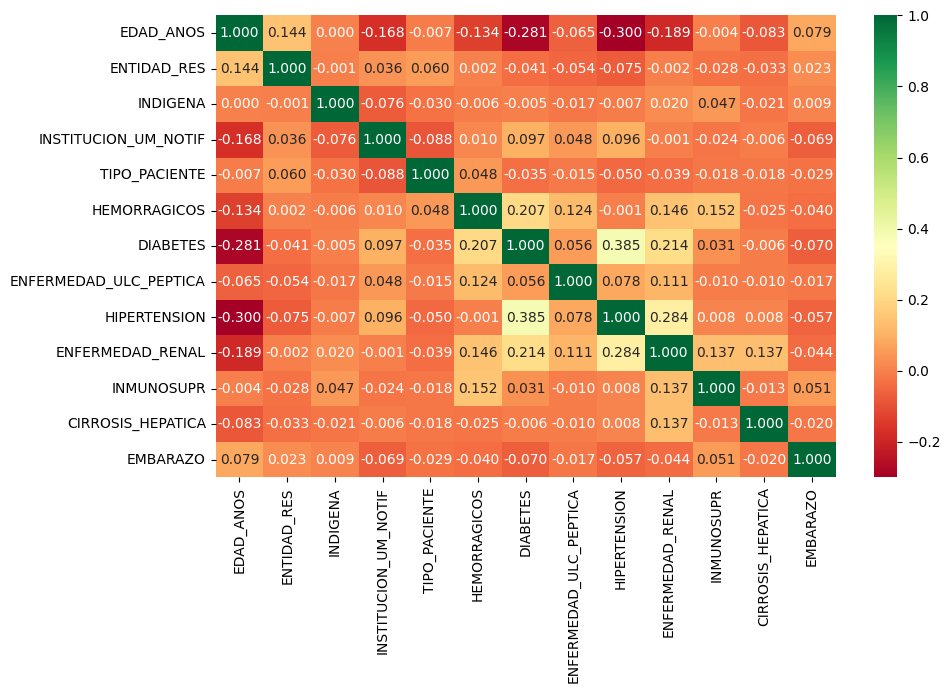

In [129]:
print("La matriz de correlación para la defunción es")
defun_data_corr = defun_data[['EDAD_ANOS','ENTIDAD_RES','INDIGENA','INSTITUCION_UM_NOTIF','TIPO_PACIENTE','HEMORRAGICOS','DIABETES','ENFERMEDAD_ULC_PEPTICA','HIPERTENSION','ENFERMEDAD_RENAL','INMUNOSUPR','CIRROSIS_HEPATICA','EMBARAZO']] #Valores a correlacionar
corr_matrix(defun_data_corr)